In [9]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import matplotlib.pyplot as plt
import os
import rasterio
from rasterio.plot import show

In [2]:
def hillshade(array, azimuth=315, angle_altitude=45):
    az = np.deg2rad(azimuth)
    alt = np.deg2rad(angle_altitude)

    x, y = np.gradient(array.astype(float))
    slope = np.pi / 2.0 - np.arctan(np.sqrt(x * x + y * y))
    aspect = np.arctan2(-x, y)

    shaded = (np.sin(alt) * np.sin(slope) +
              np.cos(alt) * np.cos(slope) * np.cos(az - aspect))
    return 255 * (shaded + 1) / 2


def resample_to_resolution(src, new_resolution):
    transform, width, height = calculate_default_transform(
        src.crs, src.crs,
        src.width, src.height,
        *src.bounds,
        resolution=new_resolution
    )

    profile = src.profile.copy()
    profile.update({
        "height": height,
        "width": width,
        "transform": transform
    })

    data_resampled = np.empty((height, width), dtype=src.profile["dtype"])

    reproject(
        source=rasterio.band(src, 1),
        destination=data_resampled,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=src.crs,
        resampling=Resampling.bilinear
    )

    return data_resampled, profile


In [4]:
src_path = "dados/rec_geosampa.tif"  # troque pelo caminho do TIFF GeoSampa

with rasterio.open(src_path) as src:
    data_05m = src.read(1)

    data_10m, profile_10m = resample_to_resolution(src, 10)
    data_30m, profile_30m = resample_to_resolution(src, 30)

    # --- salvar os reamostrados em disco ---
    with rasterio.open("rec_geosampa_10m.tif", "w", **profile_10m) as dst:
        dst.write(data_10m, 1)

    with rasterio.open("rec_geosampa_30m.tif", "w", **profile_30m) as dst:
        dst.write(data_30m, 1)

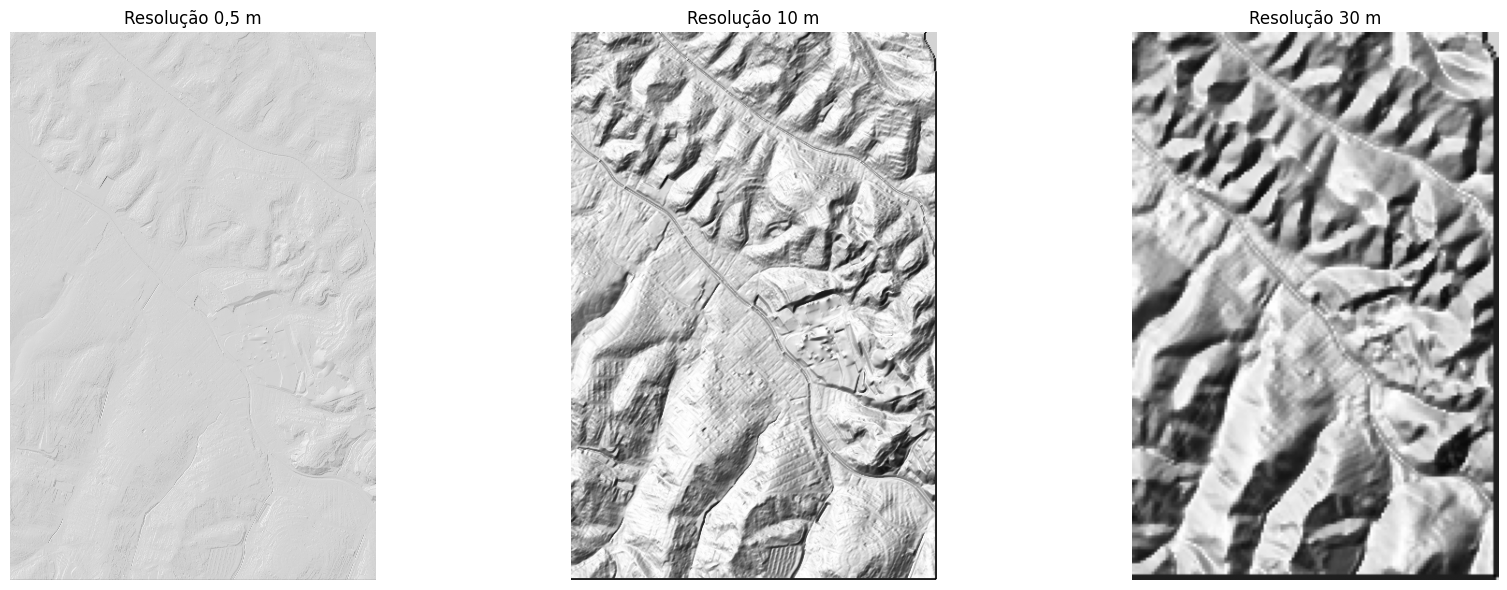

In [5]:
# ---------- Hillshade ----------
hs_05 = hillshade(data_05m)
hs_10 = hillshade(data_10m)
hs_30 = hillshade(data_30m)

# ---------- Plot ----------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(hs_05, cmap="gray")
axes[0].set_title("Resolução 0,5 m")
axes[0].axis("off")

axes[1].imshow(hs_10, cmap="gray")
axes[1].set_title("Resolução 10 m")
axes[1].axis("off")

axes[2].imshow(hs_30, cmap="gray")
axes[2].set_title("Resolução 30 m")
axes[2].axis("off")

plt.tight_layout()
plt.show()

d:\git\capstone_ipt\venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


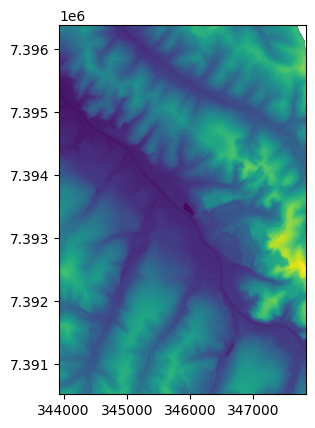

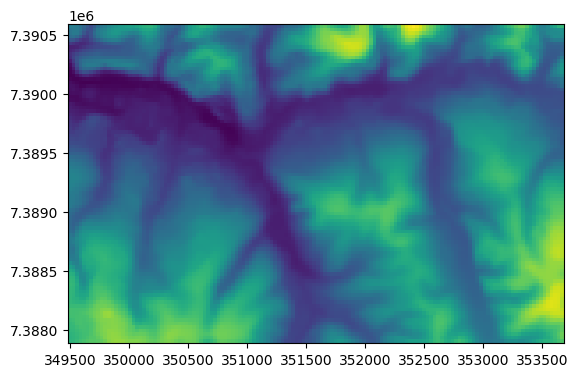

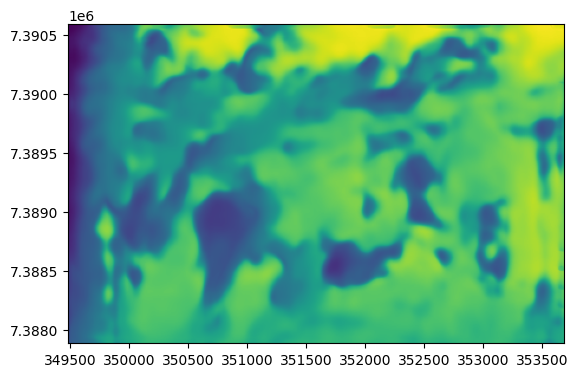

<Axes: >

In [3]:
import os
import rasterio
from rasterio.plot import show
data_dir = "dados"
fp = os.path.join(data_dir, "rec_geosampa.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = os.path.join(data_dir, "rec_anadem_teste.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = "output_10m.tif"
reprojected = rasterio.open(fp)
show(reprojected)

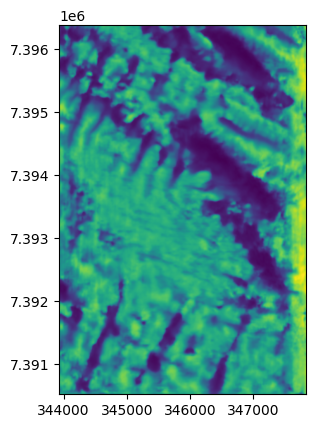

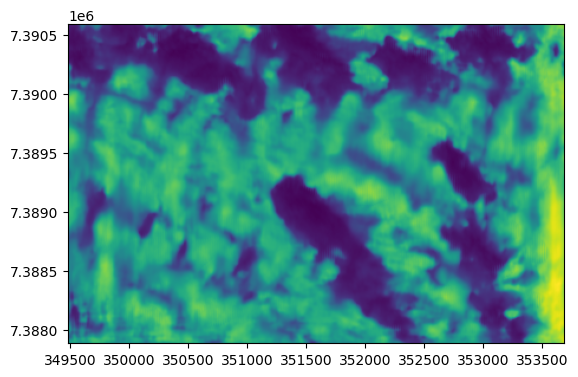

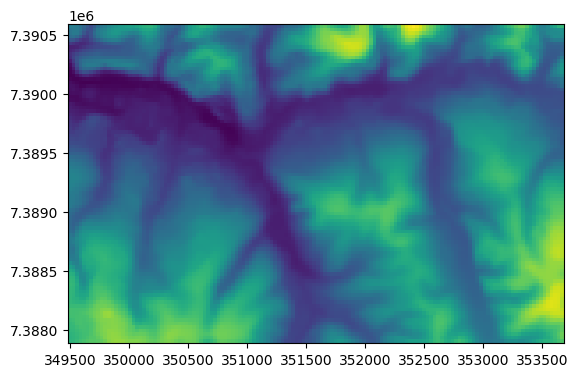

<Axes: >

In [1]:
import os
import rasterio
from rasterio.plot import show
data_dir = "output"
fp = os.path.join(data_dir, "anadem_16f_40ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = os.path.join(data_dir, "anadem_teste_16f_40ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = "dados/rec_anadem_teste.tif"
reprojected = rasterio.open(fp)
show(reprojected)

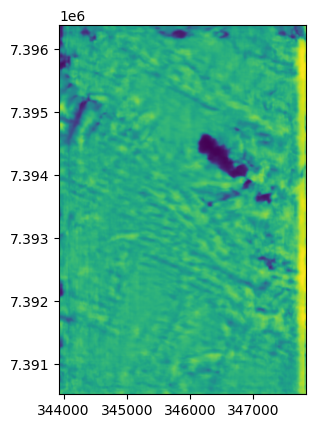

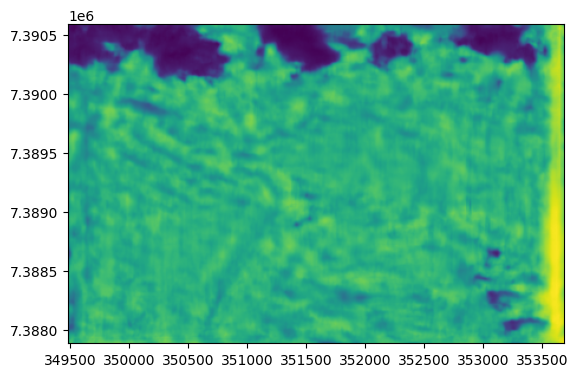

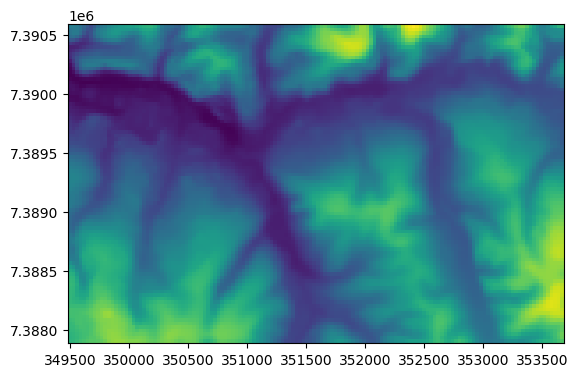

<Axes: >

In [ ]:
import os
import rasterio
from rasterio.plot import show
data_dir = "output"
fp = os.path.join(data_dir, "anadem_16f_120ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = os.path.join(data_dir, "anadem_teste_16f_120ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = "dados/rec_anadem_teste.tif"
reprojected = rasterio.open(fp)
show(reprojected)

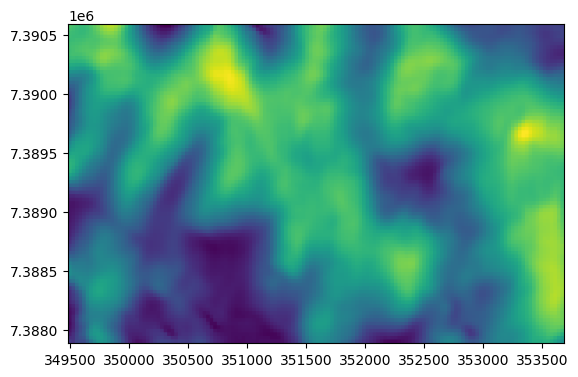

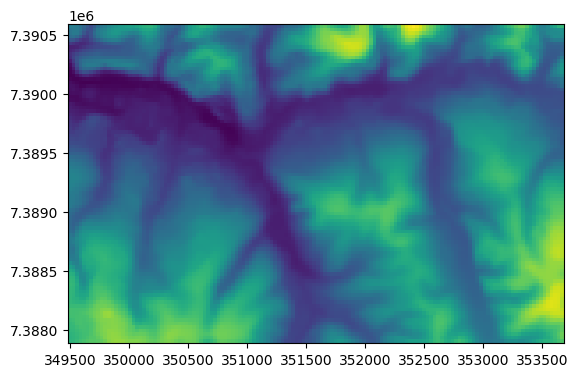

<Axes: >

In [2]:
import os
import rasterio
from rasterio.plot import show

fp = "rec_anadem_teste_40epc_v2.tif"
reprojected = rasterio.open(fp)
show(reprojected)
fp = "dados/rec_anadem_teste.tif"
reprojected = rasterio.open(fp)
show(reprojected)

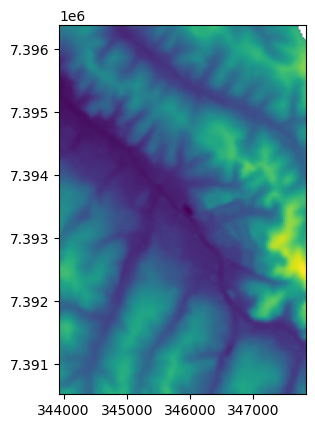

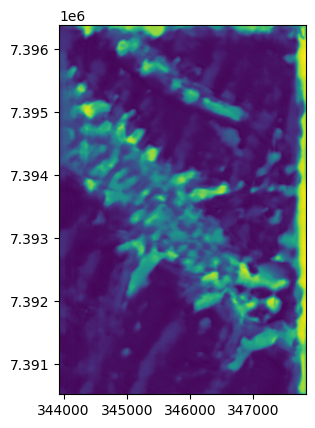

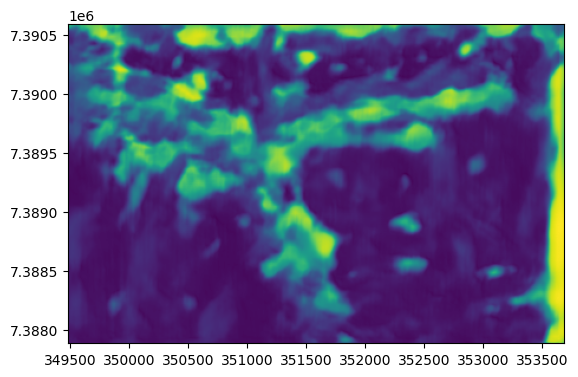

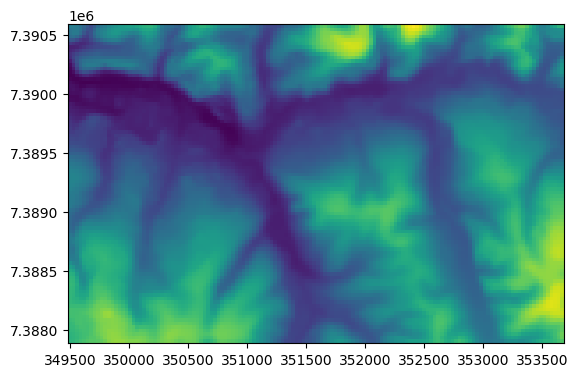

<Axes: >

In [6]:
import os
import rasterio
from rasterio.plot import show
fp = "dados/rec_anadem.tif"
reprojected = rasterio.open(fp)
show(reprojected)
data_dir = "output"
fp = os.path.join(data_dir, "anadem_32f_50ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = os.path.join(data_dir, "anadem_teste_32f_50ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = "dados/rec_anadem_teste.tif"
reprojected = rasterio.open(fp)
show(reprojected)

d:\git\capstone_ipt\venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


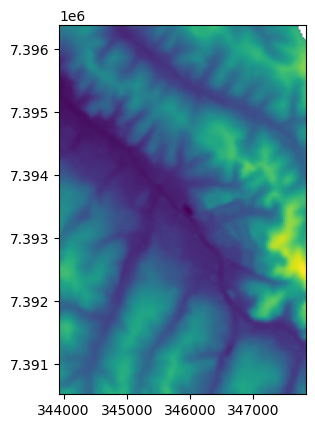

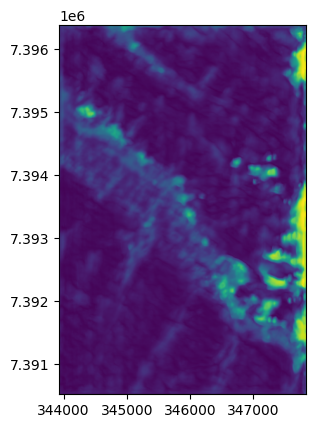

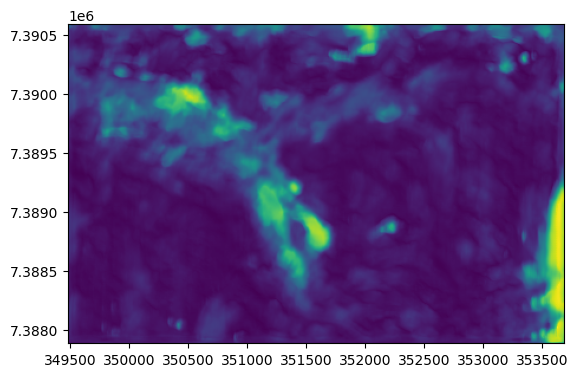

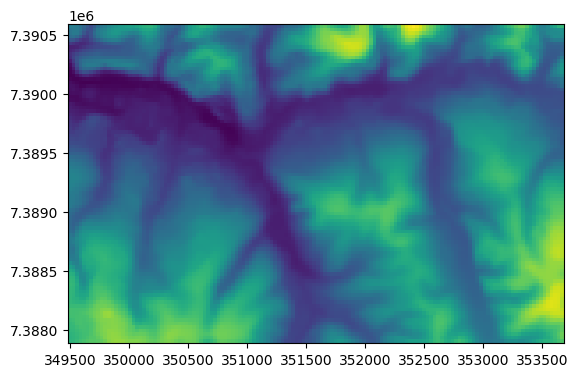

<Axes: >

In [8]:
fp = "dados/rec_anadem.tif"
reprojected = rasterio.open(fp)
show(reprojected)
data_dir = "output"
fp = os.path.join(data_dir, "anadem_32f_150ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = os.path.join(data_dir, "anadem_teste_32f_150ep_10m.tif")
reprojected = rasterio.open(fp)
show(reprojected)
fp = "dados/rec_anadem_teste.tif"
reprojected = rasterio.open(fp)
show(reprojected)



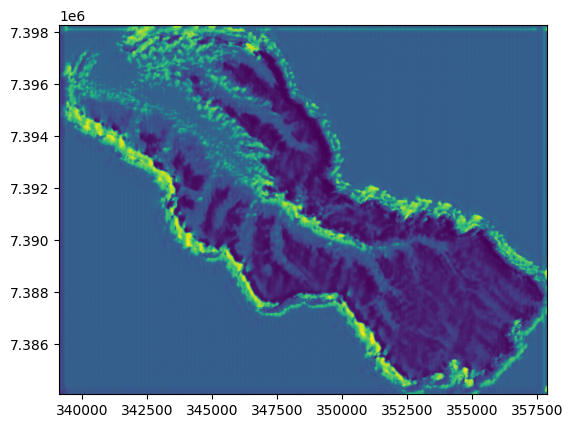

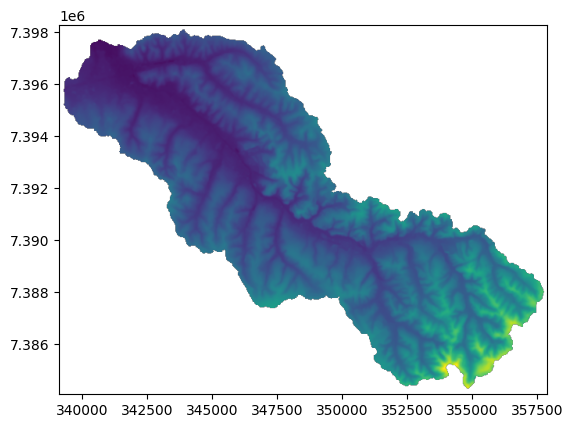

<Axes: >

In [4]:
fp = "output/ANADEM_Aricanduva_16f_30ep_10m.tif"
reprojected = rasterio.open(fp)
show(reprojected)
fp = "dados/ANADEM_AricanduvaBufferUTM.tif"
reprojected = rasterio.open(fp)
show(reprojected)

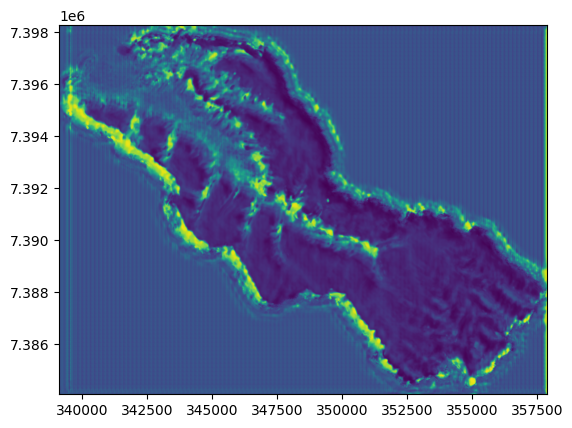

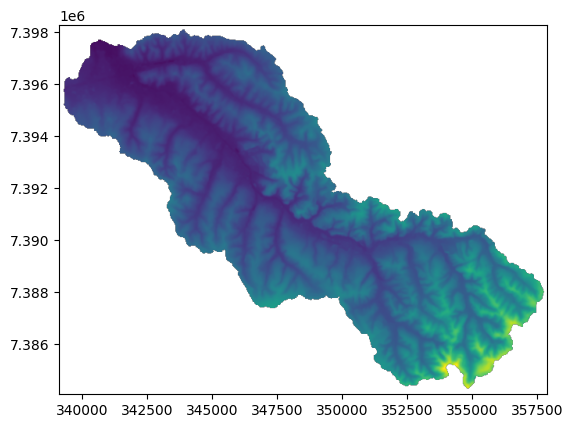

<Axes: >

In [5]:
fp = "output/ANADEM_Aricanduva_16f_80ep_10m.tif"
reprojected = rasterio.open(fp)
show(reprojected)
fp = "dados/ANADEM_AricanduvaBufferUTM.tif"
reprojected = rasterio.open(fp)
show(reprojected)


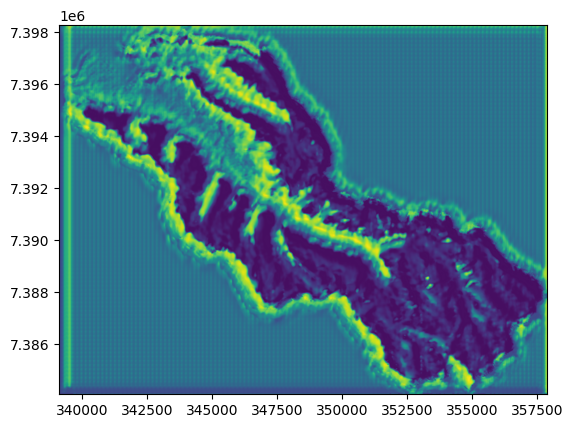

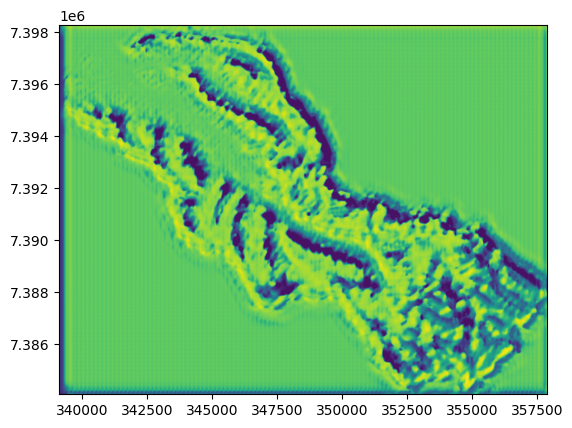

<Axes: >

In [11]:

fp = "output/ANADEM_Aricanduva_16f_40ep_10_bs4.tif"
reprojected = rasterio.open(fp)
show(reprojected)

fp = "output/ANADEM_Aricanduva_16f_40ep_10_bs8.tif"
reprojected = rasterio.open(fp)
show(reprojected)


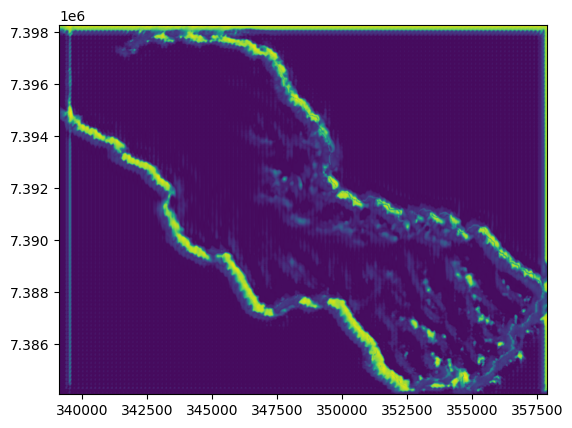

<Axes: >

In [12]:
fp = "output/ANADEM_Aricanduva_16f_20ep_10_bs2_p256.tif"
reprojected = rasterio.open(fp)
show(reprojected)


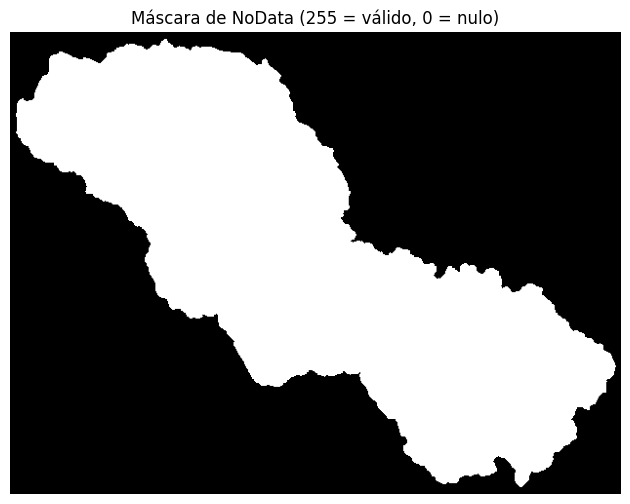

In [14]:
# Visualizar a máscara de NoData do raster
fp = "output/ANADEM_Aricanduva_16f_20ep_10_bs2_p256.tif"
fp = "dados/ANADEM_AricanduvaBufferUTM.tif"
with rasterio.open(fp) as src:
    mask = src.read_masks(1)
    plt.figure(figsize=(8,6))
    plt.imshow(mask, cmap='gray')
    plt.title('Máscara de NoData (255 = válido, 0 = nulo)')
    plt.axis('off')
    plt.show()

In [2]:
# Inspecionar valores do raster de entrada e do output
import numpy as np
import rasterio
def inspect_raster(fp):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        nodata = src.nodata
        print(f"Arquivo: {fp}")
        print(f"NoData: {nodata}")
        print(f"Shape: {arr.shape}")
        print(f"Min: {np.nanmin(arr)} | Max: {np.nanmax(arr)}")
        print(f"Valores únicos: {np.unique(arr)[:10]} ...")
        print(f"Qtd. de nulos: {(arr == nodata).sum()}")
        print(f"Qtd. de válidos: {(arr != nodata).sum()}")
        print()
        return arr, nodata
input_fp = "dados/ANADEM_AricanduvaBufferUTM.tif"
output_fp = "output/ANADEM_Aricanduva_16f_20ep_10_bs2_p256.tif"
arr_in, nodata_in = inspect_raster(input_fp)
arr_out, nodata_out = inspect_raster(output_fp)

Arquivo: dados/ANADEM_AricanduvaBufferUTM.tif
NoData: -3.4028234663852886e+38
Shape: (474, 626)
Min: -3.4028234663852886e+38 | Max: 984.3444213867188
Valores únicos: [-3.4028235e+38  7.1500000e+02  7.1515802e+02  7.1553906e+02
  7.1679669e+02  7.1706189e+02  7.1723859e+02  7.1862805e+02
  7.1888306e+02  7.2074152e+02] ...
Qtd. de nulos: 177820
Qtd. de válidos: 118904

Arquivo: output/ANADEM_Aricanduva_16f_20ep_10_bs2_p256.tif
NoData: -3.4028234663852886e+38
Shape: (1422, 1878)
Min: 736.4676513671875 | Max: 977.2257690429688
Valores únicos: [736.46765 736.4752  737.2391  737.4689  737.49646 737.54736 738.16986
 738.2546  738.3162  738.425  ] ...
Qtd. de nulos: 0
Qtd. de válidos: 2670516

Valores únicos: [736.46765 736.4752  737.2391  737.4689  737.49646 737.54736 738.16986
 738.2546  738.3162  738.425  ] ...
Qtd. de nulos: 0
Qtd. de válidos: 2670516



In [4]:
import numpy as np
from skimage.transform import resize

# Redimensionar a máscara do input para o shape do output
mask_in = (arr_in == nodata_in).astype(np.float32)
mask_in_resized = resize(mask_in, arr_out.shape, order=0, preserve_range=True, anti_aliasing=False)
arr_out_masked = arr_out.copy()
arr_out_masked[mask_in_resized == 1] = nodata_out

In [5]:
import rasterio

output_masked_fp = "output/ANADEM_Aricanduva_16f_20ep_10_bs2_p256_masked.tif"

# Copiar o perfil do output original
with rasterio.open(output_fp) as src_out:
    profile = src_out.profile.copy()
    profile.update({'nodata': nodata_out})

# Salvar o raster mascarado
with rasterio.open(output_masked_fp, "w", **profile) as dst:
    dst.write(arr_out_masked, 1)

print(f"Arquivo salvo: {output_masked_fp}")

Arquivo salvo: output/ANADEM_Aricanduva_16f_20ep_10_bs2_p256_masked.tif


d:\git\capstone_ipt\venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


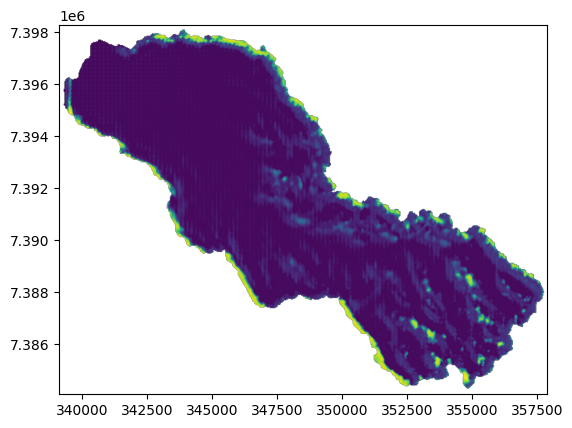

In [6]:
# Visualizar o arquivo mascarado gerado
import rasterio
from rasterio.plot import show
fp = "output/ANADEM_Aricanduva_16f_20ep_10_bs2_p256_masked.tif"
with rasterio.open(fp) as src:
    show(src)